# Group Project 3 – Visualization Ethics and Communication
### Titanic Dataset: Pie Charts

### Imports & Data Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

df = pd.read_csv('data/train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton


In [8]:
df.info()
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Port         889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Cabin          687
Age            177
Embarked         2
Port             2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Grouping the data
- data into groups based on the unique values of that column.

In [2]:
sex_surv   = df.groupby('Sex')['Survived'].sum()          
sex_dead   = df.groupby('Sex')['Survived'].apply(lambda x: (x == 0).sum())
sex_total  = df.groupby('Sex')['Survived'].count()
sex_rate   = df.groupby('Sex')['Survived'].mean() * 100

female_surv  = sex_surv['female']
female_dead  = sex_dead['female']
male_surv    = sex_surv['male']
male_dead    = sex_dead['male']


port_map   = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
df['Port'] = df['Embarked'].map(port_map)
port_total = df['Port'].value_counts()                    
port_rate  = df.groupby('Port')['Survived'].mean() * 100  
port_surv  = df.groupby('Port')['Survived'].sum()
port_dead  = df.groupby('Port')['Survived'].apply(lambda x: (x == 0).sum())

print('Sex survival rates:')
print(sex_rate.round(1))
print('\nPort totals & survival rates:')
print(pd.DataFrame({'passengers': port_total, 'survival_%': port_rate.round(1)}))

Sex survival rates:
Sex
female    74.2
male      18.9
Name: Survived, dtype: float64

Port totals & survival rates:
             passengers  survival_%
Port                               
Cherbourg           168        55.4
Queenstown           77        39.0
Southampton         644        33.7



##  Accurate Pie Chart 1
### Survival Outcome by Gender — all four segments, counts + percentages

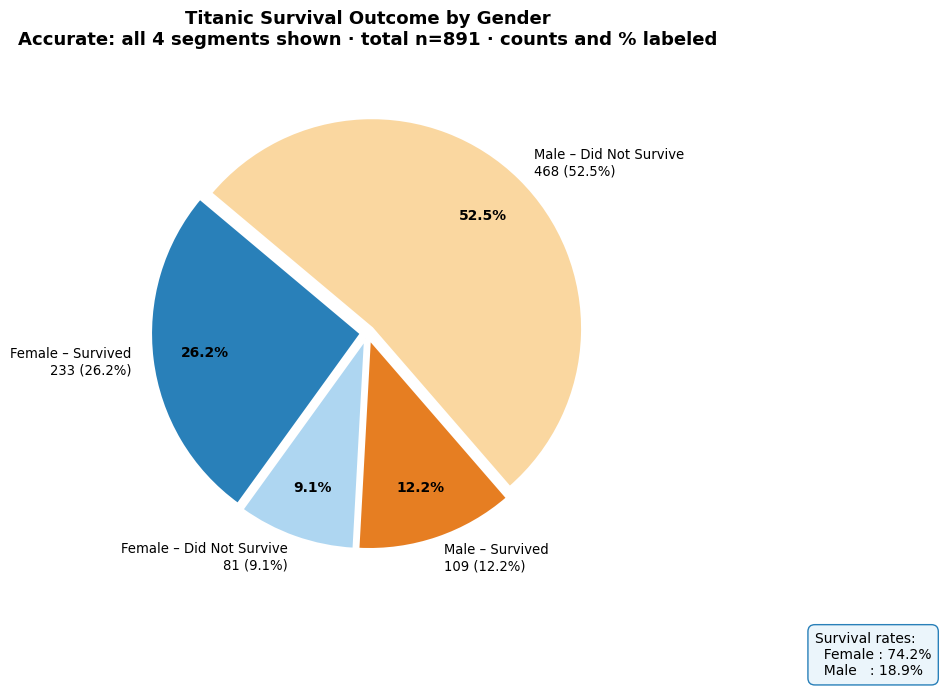

In [3]:
sizes  = [female_surv, female_dead, male_surv, male_dead]
labels = [
    f'Female – Survived\n{female_surv} ({female_surv/len(df)*100:.1f}%)',
    f'Female – Did Not Survive\n{female_dead} ({female_dead/len(df)*100:.1f}%)',
    f'Male – Survived\n{male_surv} ({male_surv/len(df)*100:.1f}%)',
    f'Male – Did Not Survive\n{male_dead} ({male_dead/len(df)*100:.1f}%)'
]
colors = ['#2980B9', '#AED6F1', '#E67E22', '#FAD7A0']

fig, ax = plt.subplots(figsize=(9, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.03, 0.03, 0.03, 0.03),     # equal subtle gap — no bias
    wedgeprops=dict(edgecolor='white', linewidth=2),
    pctdistance=0.75
)

for at in autotexts:
    at.set_fontsize(10)
    at.set_fontweight('bold')
for t in texts:
    t.set_fontsize(9.5)

ax.set_title(
    f'Titanic Survival Outcome by Gender\n'
    f'Accurate: all 4 segments shown · total n={len(df)} · counts and % labeled',
    fontsize=13, fontweight='bold', pad=18)

# Survival rate callout box
ax.text(1.35, -0.15,
        f'Survival rates:\n'
        f'  Female : {sex_rate["female"]:.1f}%\n'
        f'  Male   : {sex_rate["male"]:.1f}%',
        transform=ax.transAxes, fontsize=10,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#EBF5FB', edgecolor='#2980B9'))

plt.tight_layout()
plt.savefig('accurate_1_pie_sex.png', dpi=150, bbox_inches='tight')
plt.show()

**Why this visualization is accurate and ethical:**
- All **four outcome segments** are shown (Female Survived, Female Died, Male Survived, Male Died) — nothing is hidden or merged.
- Both **raw counts and percentages** appear on every slice, giving viewers full context.
- The **total sample size (n=891)** is stated in the title.
- All wedges have an equal, small explode — no slice is visually inflated.
- A callout box clearly states the survival rates for both sexes so viewers can read the key insight directly.


##  Accurate Pie Chart 2
### Passenger Distribution by Embarkation Port — with survival rate overlay

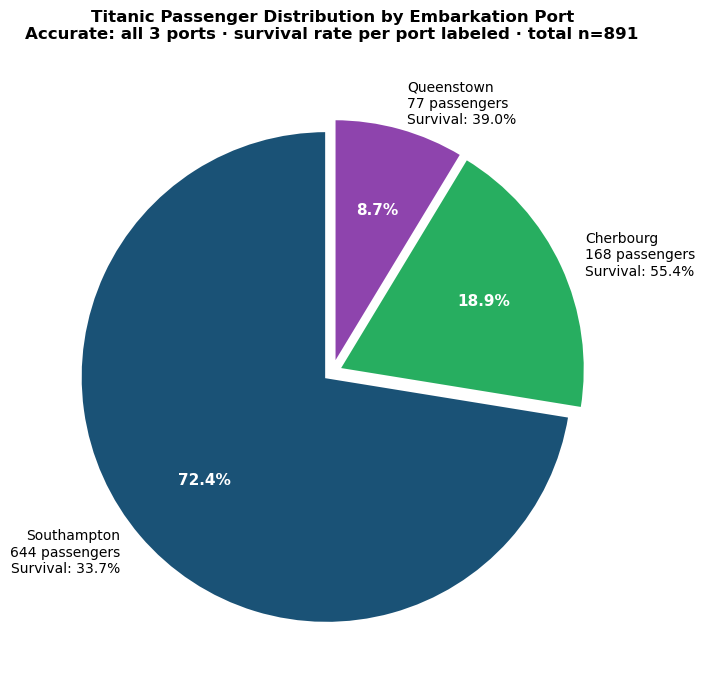

In [4]:
ports_ordered = ['Southampton', 'Cherbourg', 'Queenstown']
p_sizes  = [port_total[p] for p in ports_ordered]
p_rates  = [port_rate[p] for p in ports_ordered]
p_survs  = [port_surv[p] for p in ports_ordered]
p_colors = ['#1A5276', '#27AE60', '#8E44AD']

p_labels = [
    f'{p}\n{n} passengers\nSurvival: {r:.1f}%'
    for p, n, r in zip(ports_ordered, p_sizes, p_rates)
]

fig, ax = plt.subplots(figsize=(9, 7))
wedges, texts, autotexts = ax.pie(
    p_sizes,
    labels=p_labels,
    colors=p_colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.03, 0.03, 0.03),
    wedgeprops=dict(edgecolor='white', linewidth=2),
    pctdistance=0.65
)

for at in autotexts:
    at.set_fontsize(11)
    at.set_fontweight('bold')
    at.set_color('white')
for t in texts:
    t.set_fontsize(10)

ax.set_title(
    f'Titanic Passenger Distribution by Embarkation Port\n'
    f'Accurate: all 3 ports · survival rate per port labeled · total n={len(df)}',
    fontsize=12, fontweight='bold', pad=18)

plt.tight_layout()
plt.savefig('accurate_2_pie_port.png', dpi=150, bbox_inches='tight')
plt.show()

**Why this visualization is accurate and ethical:**
- All **three embarkation ports** are represented — no group is dropped.
- Each slice label includes **passenger count, share percentage, and survival rate**, giving viewers three layers of honest context.
- Cherbourg's notably higher survival rate (55.4%) is visible alongside its slice size, so viewers can judge without the chart making the conclusion for them.
- Equal explode on all slices ensures no port is visually emphasised over another.

##  Misleading Pie Chart 1
### Survival by Gender — massively exploded male slice + no counts = false equality

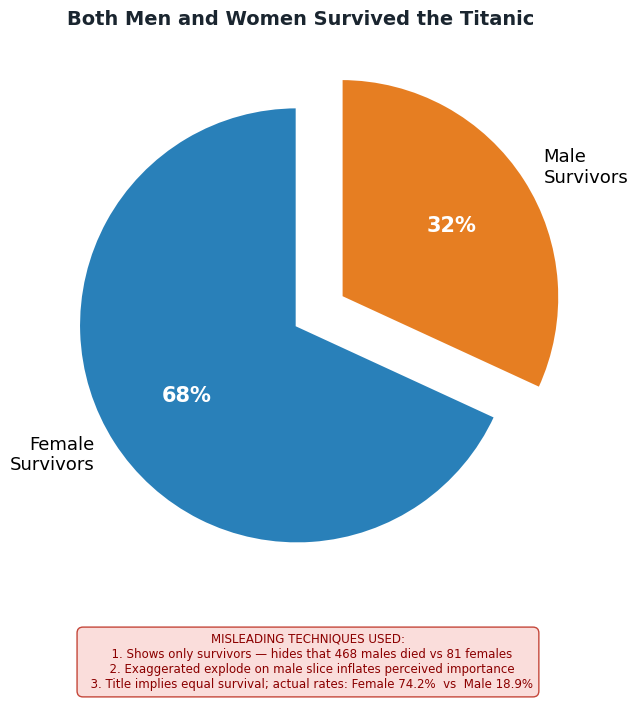

In [5]:
mislead_sizes  = [female_surv, male_surv]
mislead_labels = ['Female\nSurvivors', 'Male\nSurvivors']

fig, ax = plt.subplots(figsize=(8, 7))
wedges, texts, autotexts = ax.pie(
    mislead_sizes,
    labels=mislead_labels,
    colors=['#2980B9', '#E67E22'],
    autopct='%1.0f%%',
    startangle=90,
    # MISLEADING CHOICE 1: huge explode on male slice draws attention & inflates it
    explode=(0.02, 0.22),
    wedgeprops=dict(edgecolor='white', linewidth=2),
    pctdistance=0.6
)

for at in autotexts:
    at.set_fontsize(15)
    at.set_fontweight('bold')
    at.set_color('white')
for t in texts:
    t.set_fontsize(13)

# MISLEADING CHOICE 2: title implies men and women had similar survival chances
ax.set_title(
    'Both Men and Women Survived the Titanic',
    fontsize=14, fontweight='bold', color='#1A252F', pad=18)

# MISLEADING CHOICE 3: no mention that male survival RATE was only 18.9% vs 74.2%

# Educational warning
fig.text(0.5, 0.01,
         'MISLEADING TECHNIQUES USED:\n'
         '  1. Shows only survivors — hides that 468 males died vs 81 females\n'
         '  2. Exaggerated explode on male slice inflates perceived importance\n'
         '  3. Title implies equal survival; actual rates: Female 74.2%  vs  Male 18.9%',
         ha='center', fontsize=8.5, color='darkred',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#FADBD8', edgecolor='#C0392B', alpha=0.92))

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.savefig('misleading_1_pie_sex.png', dpi=150, bbox_inches='tight')
plt.show()

**How this visualization misleads viewers:**
1. **Shows only survivors, not rates:** 233 female survivors vs 109 male survivors looks somewhat comparable in a pie — but the *rates* are 74.2% vs 18.9%. The chart hides the 468 men who died.
2. **Exaggerated male explode:** Pulling the male slice out dramatically draws the eye and makes it look proportionally larger than it is.
3. **Title implies equality:** 'Both Men and Women Survived' is technically true but deeply misleading — it buries the most important story in the data.

##  Misleading Pie Chart 2
### Embarkation Port — Southampton omitted, making Cherbourg look dominant

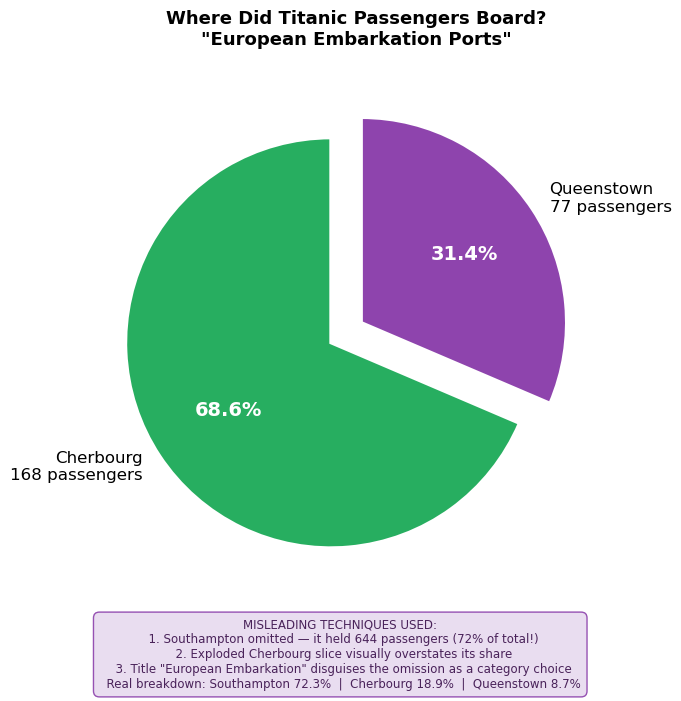

In [6]:

cherry_ports  = ['Cherbourg', 'Queenstown']
cherry_sizes  = [port_total[p] for p in cherry_ports]
cherry_colors = ['#27AE60', '#8E44AD']
cherry_labels = [f'{p}\n{n} passengers' for p, n in zip(cherry_ports, cherry_sizes)]

fig, ax = plt.subplots(figsize=(8, 7))
wedges, texts, autotexts = ax.pie(
    cherry_sizes,
    labels=cherry_labels,
    colors=cherry_colors,
    autopct='%1.1f%%',
    startangle=90,

    explode=(0.15, 0.03),
    wedgeprops=dict(edgecolor='white', linewidth=2),
    pctdistance=0.6
)

for at in autotexts:
    at.set_fontsize(14)
    at.set_fontweight('bold')
    at.set_color('white')
for t in texts:
    t.set_fontsize(12)

ax.set_title(
    'Where Did Titanic Passengers Board?\n"European Embarkation Ports"',
    fontsize=13, fontweight='bold', pad=18)
fig.text(0.5, 0.01,
         'MISLEADING TECHNIQUES USED:\n'
         '  1. Southampton omitted — it held 644 passengers (72% of total!)\n'
         '  2. Exploded Cherbourg slice visually overstates its share\n'
         '  3. Title "European Embarkation" disguises the omission as a category choice\n'
         '  Real breakdown: Southampton 72.3%  |  Cherbourg 18.9%  |  Queenstown 8.7%',
         ha='center', fontsize=8.5, color='#4A235A',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#E8DAEF', edgecolor='#8E44AD', alpha=0.92))

plt.tight_layout(rect=[0, 0.14, 1, 1])
plt.savefig('misleading_2_pie_port.png', dpi=150, bbox_inches='tight')
plt.show()

**How this visualization misleads viewers:**
1. **Cherry-picked ports:** Southampton accounted for **72% of all passengers (644 people)** and is silently dropped. The chart makes Cherbourg (168) and Queenstown (77) look like the main story.
2. **Exaggerated Cherbourg explode:** Pulling out the larger remaining slice inflates its visual dominance further.
3. **Title disguises the omission:** Labelling it 'European Embarkation Ports' sounds like a meaningful category — but it's just a cover for removing the largest group.
4. **Consequence on survival narrative:** Cherbourg passengers had the highest survival rate (55.4%). Omitting Southampton hides that most passengers boarded there — and most of them did not survive.

## Summary

The project highlights the critical role of ethics in data visualization by presenting two accurate charts alongside one intentionally misleading example. The gender survival pie chart transparently displays all outcome segments with counts, percentages, and total sample size, while the port distribution chart combines passenger counts with survival rate overlays for clarity. In contrast, the misleading port chart demonstrates how selective data omission can distort interpretation, emphasizing the danger of “cherry-picking.” Overall, the analysis reinforces that while visualizations are powerful tools for communication, a data scientist’s foremost responsibility is to maintain integrity, completeness, and transparency, ensuring that insights reflect the true story rather than a manipulated narrative.